# Projet 08 : Communiquer des résultats
# Partie 3 : Modélisation - Analyse des résultats

---

## <font color=blue>Sommaire</font>

[3. Modélisation](#3_0)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.7. Etude des deux modèles de régression linéaire pour estimer la somme des signaux à venir](#3_7)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.8. Interprétation des résultats](#3_8)  

---
**Importation des librairies**

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#import warnings
#warnings.filterwarnings('ignore')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.colors as plc
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import modules_perso.sf_graphiques as sfg
import modules_perso.sf_classification_acp as sfca
import modules_perso.sf_modeles_anova as sfma

<a id='3_0'></a>

---
## <font color=blue>Mission 3 : Modélisation</font>

In [4]:
echant_alea21 = pd.read_csv("echantillon_alea_data21.csv", parse_dates=["dateref"])
echant_alea21.head()

,contract_id,dateref,category_name,somme_signaux,variation_21_standard,cluster,top_cluster,BRO,FOT,MOM,...,FOT-MT2,FOT-MT3,MOM-LT1,MOM-LT2,MOM-LT3,MOM-MT1,MOM-MT2,MOM-MT3,tendance_cluster,tendance_seuil
0,9,2015-07-22,LTIR,165,4.013552e-01,8,False,69,31,65,...,-8,-2,25,25,25,-10,0,0,True,True
1,91,2009-06-29,Metals,30,5.976307e-02,2,False,7,23,0,...,17,14,-25,-25,-25,25,25,25,True,False
2,32,2009-08-14,STIR,416,5.403889e-01,0,True,150,116,150,...,23,20,25,25,25,25,25,25,True,True
3,6,2010-02-26,Currencies,67,-4.207197e-01,6,False,59,-6,14,...,-4,-2,25,25,11,-25,-25,3,True,True
4,37,2011-08-18,STIR,432,-3.030987e-13,1,False,150,132,150,...,21,17,25,25,25,25,25,25,False,False


In [5]:
somme_par_indicateur = pd.read_csv("agreg_contrat_indicateur.csv", parse_dates=["dateref"], index_col=0)
somme_par_indicateur.head()

C:\Anaconda3\envs\Jupyter\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,trading_indicator,category_name,contract_id,dateref,somme_signaux
0,BRO,Currencies,1,1989-11-01,0
1,BRO,Currencies,1,1989-11-02,0
2,BRO,Currencies,1,1989-11-03,0
3,BRO,Currencies,1,1989-11-06,0
4,BRO,Currencies,1,1989-11-07,0


In [6]:
somme_par_indicateur["somme_5"] = somme_par_indicateur.groupby(["trading_indicator","category_name","contract_id"]).somme_signaux.shift(5)
somme_par_indicateur["somme_10"] = somme_par_indicateur.groupby(["trading_indicator","category_name","contract_id"]).somme_signaux.shift(10)
somme_par_indicateur["somme_15"] = somme_par_indicateur.groupby(["trading_indicator","category_name","contract_id"]).somme_signaux.shift(15)
somme_par_indicateur["somme_20"] = somme_par_indicateur.groupby(["trading_indicator","category_name","contract_id"]).somme_signaux.shift(20)
somme_par_indicateur.head(25)

,trading_indicator,category_name,contract_id,dateref,somme_signaux,somme_5,somme_10,somme_15,somme_20
0,BRO,Currencies,1,1989-11-01,0,NaN,NaN,NaN,NaN
1,BRO,Currencies,1,1989-11-02,0,NaN,NaN,NaN,NaN
2,BRO,Currencies,1,1989-11-03,0,NaN,NaN,NaN,NaN
3,BRO,Currencies,1,1989-11-06,0,NaN,NaN,NaN,NaN
4,BRO,Currencies,1,1989-11-07,0,NaN,NaN,NaN,NaN
5,BRO,Currencies,1,1989-11-08,0,0.0,NaN,NaN,NaN
6,BRO,Currencies,1,1989-11-09,0,0.0,NaN,NaN,NaN
7,BRO,Currencies,1,1989-11-13,0,0.0,NaN,NaN,NaN
8,BRO,Currencies,1,1989-11-14,0,0.0,NaN,NaN,NaN
9,BRO,Currencies,1,1989-11-15,0,0.0,NaN,NaN,NaN


In [7]:
somme_par_indicateur.dropna(inplace=True)
somme_par_indicateur.tail(25)

,trading_indicator,category_name,contract_id,dateref,somme_signaux,somme_5,somme_10,somme_15,somme_20
1080116,MOM,STIR,40,2019-09-27,143,150.0,150.0,150.0,150.0
1080117,MOM,STIR,40,2019-09-30,140,149.0,150.0,150.0,150.0
1080118,MOM,STIR,40,2019-10-01,139,147.0,150.0,150.0,150.0
1080119,MOM,STIR,40,2019-10-02,138,146.0,150.0,150.0,150.0
1080120,MOM,STIR,40,2019-10-03,136,144.0,150.0,150.0,150.0
1080121,MOM,STIR,40,2019-10-04,135,143.0,150.0,150.0,150.0
1080122,MOM,STIR,40,2019-10-07,133,140.0,149.0,150.0,150.0
1080123,MOM,STIR,40,2019-10-08,131,139.0,147.0,150.0,150.0
1080124,MOM,STIR,40,2019-10-09,130,138.0,146.0,150.0,150.0
1080125,MOM,STIR,40,2019-10-10,128,136.0,144.0,150.0,150.0


In [8]:
somme_par_indicateur_5 = pd.pivot_table(somme_par_indicateur, values="somme_5", columns="trading_indicator", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indicateur_5["total"] = somme_par_indicateur_5.BRO + somme_par_indicateur_5.FOT + somme_par_indicateur_5.MOM
somme_par_indicateur_5.columns = ["BRO_5","FOT_5","MOM_5","total_5"]
somme_par_indicateur_5.head()

BRO_5  FOT_5  MOM_5  total_5
contract_id dateref                                 
1           1989-12-01    0.0    0.0    0.0      0.0
            1989-12-04    0.0    0.0    0.0      0.0
            1989-12-05    0.0    0.0    0.0      0.0
            1989-12-06    0.0    0.0    0.0      0.0
            1989-12-07    0.0    0.0    0.0      0.0

In [9]:
somme_par_indicateur_10 = pd.pivot_table(somme_par_indicateur, values="somme_10", columns="trading_indicator", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indicateur_10["total"] = somme_par_indicateur_10.BRO + somme_par_indicateur_10.FOT + somme_par_indicateur_10.MOM
somme_par_indicateur_10.columns = ["BRO_10","FOT_10","MOM_10","total_10"]
somme_par_indicateur_10.head()

BRO_10  FOT_10  MOM_10  total_10
contract_id dateref                                     
1           1989-12-01     0.0     0.0     0.0       0.0
            1989-12-04     0.0     0.0     0.0       0.0
            1989-12-05     0.0     0.0     0.0       0.0
            1989-12-06     0.0     0.0     0.0       0.0
            1989-12-07     0.0     0.0     0.0       0.0

In [10]:
somme_par_indicateur_15 = pd.pivot_table(somme_par_indicateur, values="somme_15", columns="trading_indicator", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indicateur_15["total"] = somme_par_indicateur_15.BRO + somme_par_indicateur_15.FOT + somme_par_indicateur_15.MOM
somme_par_indicateur_15.columns = ["BRO_15","FOT_15","MOM_15","total_15"]
somme_par_indicateur_15.head()

BRO_15  FOT_15  MOM_15  total_15
contract_id dateref                                     
1           1989-12-01     0.0     0.0     0.0       0.0
            1989-12-04     0.0     0.0     0.0       0.0
            1989-12-05     0.0     0.0     0.0       0.0
            1989-12-06     0.0     0.0     0.0       0.0
            1989-12-07     0.0     0.0     0.0       0.0

In [11]:
somme_par_indicateur_20 = pd.pivot_table(somme_par_indicateur, values="somme_20", columns="trading_indicator", \
    index=["contract_id","dateref"], aggfunc=np.sum)
somme_par_indicateur_20["total"] = somme_par_indicateur_20.BRO + somme_par_indicateur_20.FOT + somme_par_indicateur_20.MOM
somme_par_indicateur_20.columns = ["BRO_20","FOT_20","MOM_20","total_20"]
somme_par_indicateur_20.head()

BRO_20  FOT_20  MOM_20  total_20
contract_id dateref                                     
1           1989-12-01     0.0     0.0     0.0       0.0
            1989-12-04     0.0     0.0     0.0       0.0
            1989-12-05     0.0     0.0     0.0       0.0
            1989-12-06     0.0     0.0     0.0       0.0
            1989-12-07     0.0     0.0     0.0       0.0

**Préparation des dataframes**

Je prépare l'ajout des sommes avec un décalage dans le temps.

In [12]:
echant_alea21 = echant_alea21[["contract_id","dateref","somme_signaux"]]
echant_alea21 = echant_alea21.merge(somme_par_indicateur_5[["total_5"]], how='left', left_on=["contract_id","dateref"], right_index=True)
echant_alea21 = echant_alea21.merge(somme_par_indicateur_10[["total_10"]], how='left', left_on=["contract_id","dateref"], right_index=True)
echant_alea21 = echant_alea21.merge(somme_par_indicateur_15[["total_15"]], how='left', left_on=["contract_id","dateref"], right_index=True)
echant_alea21 = echant_alea21.merge(somme_par_indicateur_20[["total_20"]], how='left', left_on=["contract_id","dateref"], right_index=True)
echant_alea21.dropna(inplace=True)
echant_alea21.head()

,contract_id,dateref,somme_signaux,total_5,total_10,total_15,total_20
0,9,2015-07-22,165,167.0,167.0,170.0,181.0
1,91,2009-06-29,30,20.0,20.0,11.0,11.0
2,32,2009-08-14,416,416.0,416.0,415.0,414.0
3,6,2010-02-26,67,86.0,105.0,95.0,110.0
4,37,2011-08-18,432,432.0,432.0,432.0,432.0


In [13]:
echant_alea21["diff_0_5"] = echant_alea21.somme_signaux - echant_alea21.total_5
echant_alea21["diff_5_10"] = echant_alea21.total_5 - echant_alea21.total_10
echant_alea21["diff_10_15"] = echant_alea21.total_10 - echant_alea21.total_15
echant_alea21["diff_15_20"] = echant_alea21.total_15 - echant_alea21.total_20
echant_alea21.head()

,contract_id,dateref,somme_signaux,total_5,total_10,total_15,total_20,diff_0_5,diff_5_10,diff_10_15,diff_15_20
0,9,2015-07-22,165,167.0,167.0,170.0,181.0,-2.0,0.0,-3.0,-11.0
1,91,2009-06-29,30,20.0,20.0,11.0,11.0,10.0,0.0,9.0,0.0
2,32,2009-08-14,416,416.0,416.0,415.0,414.0,0.0,0.0,1.0,1.0
3,6,2010-02-26,67,86.0,105.0,95.0,110.0,-19.0,-19.0,10.0,-15.0
4,37,2011-08-18,432,432.0,432.0,432.0,432.0,0.0,0.0,0.0,0.0


In [14]:
data21 = pd.read_csv("data21jours.csv", parse_dates=["dateref"], index_col=0)
data21.head()

,category_name,contract_id,dateref,somme_signaux,variation_21_standard,cluster,top_cluster
0,Currencies,1,1989-11-01,0,0.082215,2,False
1,Currencies,1,1989-11-02,0,0.239948,8,False
2,Currencies,1,1989-11-03,0,0.198553,2,False
3,Currencies,1,1989-11-06,0,0.097800,2,False
4,Currencies,1,1989-11-07,0,0.091391,2,False


In [15]:
data21.drop(columns=["variation_21_standard","cluster","top_cluster"], inplace=True)
data21["total_5"] = data21.groupby(["category_name","contract_id"]).somme_signaux.shift(5)
data21["total_10"] = data21.groupby(["category_name","contract_id"]).somme_signaux.shift(10)
data21["total_15"] = data21.groupby(["category_name","contract_id"]).somme_signaux.shift(15)
data21["total_20"] = data21.groupby(["category_name","contract_id"]).somme_signaux.shift(20)
data21.dropna(inplace=True)
data21["diff_5_10"] = data21.total_5 - data21.total_10
data21["diff_10_15"] = data21.total_10 - data21.total_15
data21["diff_15_20"] = data21.total_15 - data21.total_20
data21.head()

,category_name,contract_id,dateref,somme_signaux,total_5,total_10,total_15,total_20,diff_5_10,diff_10_15,diff_15_20
20,Currencies,1,1989-12-01,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,Currencies,1,1989-12-04,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,Currencies,1,1989-12-05,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,Currencies,1,1989-12-06,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,Currencies,1,1989-12-07,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='3_7'></a>

## 3.7. Etude des deux modèles de régression linéaire pour estimer la somme des signaux à venir

### 3.7.1. Premier modèle

**Rappel de l'étude de base**

In [16]:
data_model = echant_alea21[["somme_signaux","total_5","total_10","total_15","total_20"]].copy()
len(data_model)

71690

In [17]:
anova = smf.ols(formula="somme_signaux ~  total_5 + total_5:total_10", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 2.537e+06
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:58:24   Log-Likelihood:            -3.4989e+05
No. Observations:               71690   AIC:                         6.998e+05
Df Residuals:                   71687   BIC:                         6.998e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.2116      0.187      6.483      0.000       0.845       1.578
total_5              0.9942      0.000   2126.876      0.000       0.993       0.995
total_5:total_10  -8.94e-06   1.84e-06     -4.846      0.000   -1.26e-05   -5.32e-06
==============================================================================
Omnibus:                    10981.601   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           195702.805
Skew:                          -0.021   Prob(JB):                         0.00
Kurtosis:                      11.094   Cond. No.                     1.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

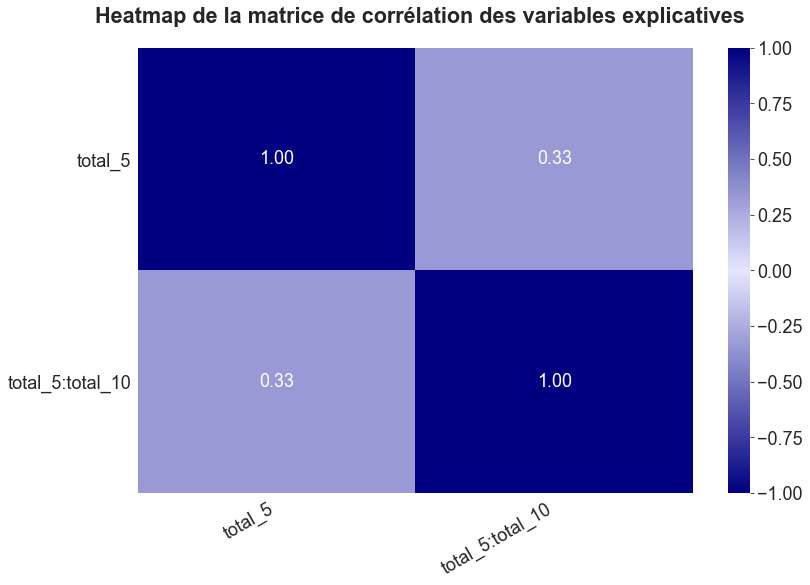

In [18]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [19]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


,VIF
total_5,1.123562
total_5:total_10,1.123562


In [20]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
total_5,5.155007e+09,1.0,5.074873e+06,0.000000,0.986066,0.986039
total_5:total_10,2.385362e+04,1.0,2.348282e+01,0.000001,0.000005,-0.000009
Residual,7.281897e+07,71687.0,NaN,NaN,NaN,NaN
total,5.227850e+09,71689.0,NaN,NaN,NaN,NaN


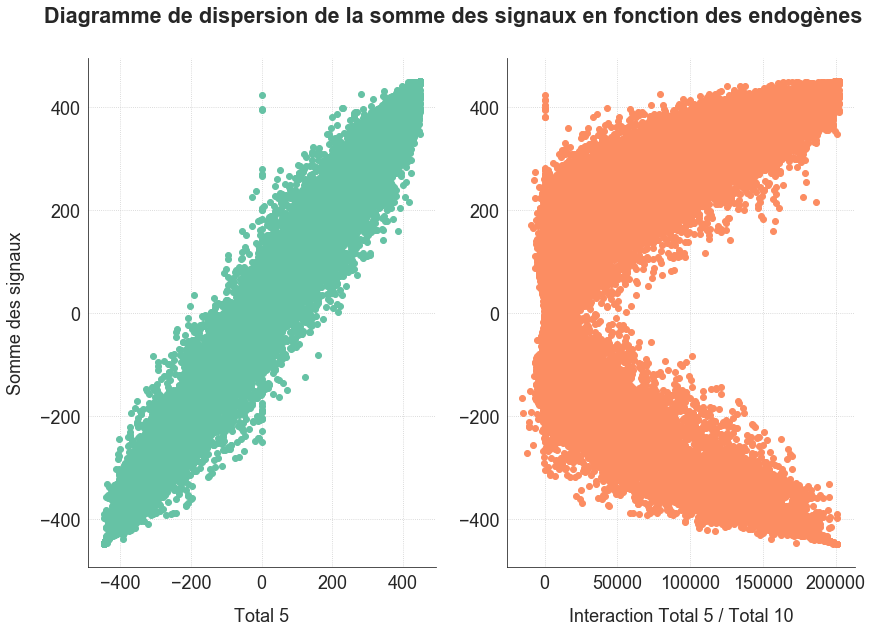

In [21]:
mygraph = sfg.MyGraph("Diagramme de dispersion de la somme des signaux en fonction des endogènes", nblin=1, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["total_5:total_10"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Interaction Total 5 / Total 10", multi_index=2)
mygraph.set_axe('y', label="Somme des signaux", multi_index=1)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_00_diagramme_dispersion.png")
plt.show()

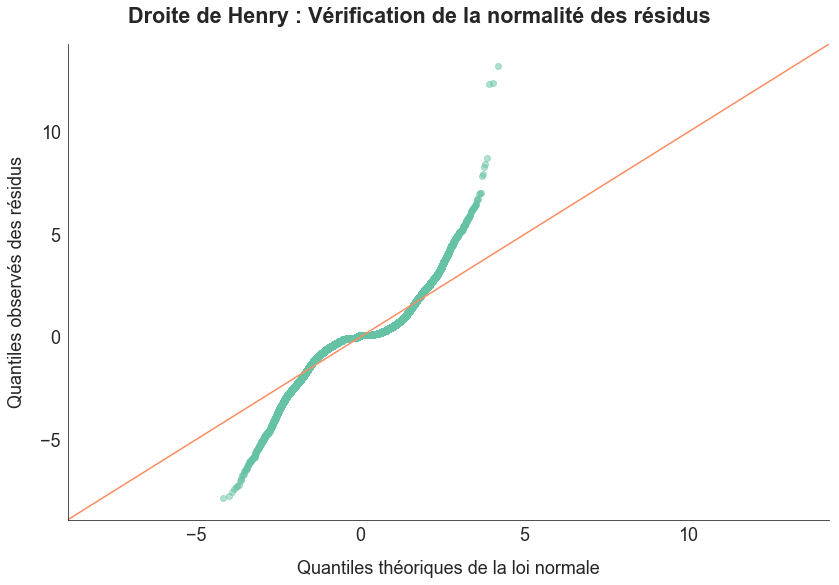

In [22]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

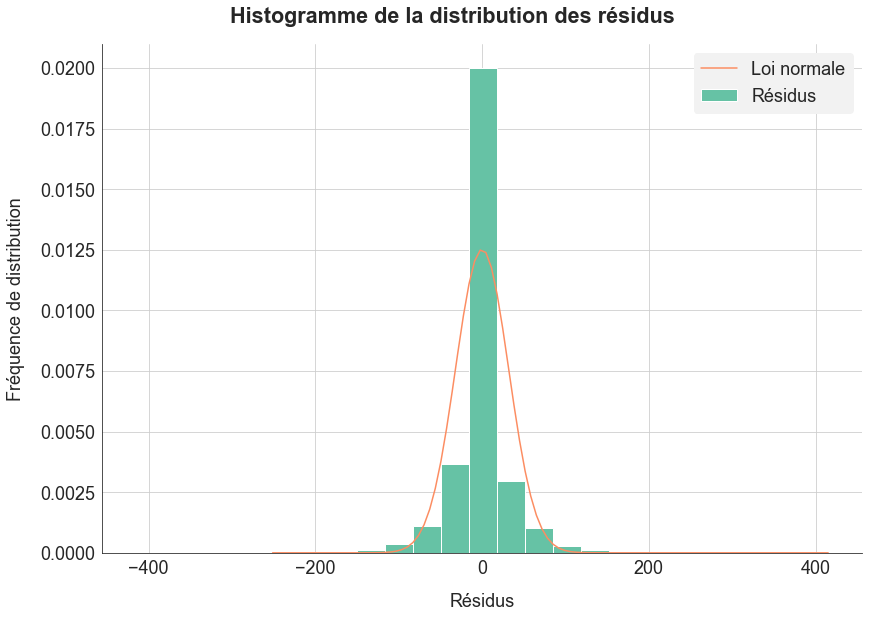

In [23]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova04_01_distribution_residus.png")
plt.show()

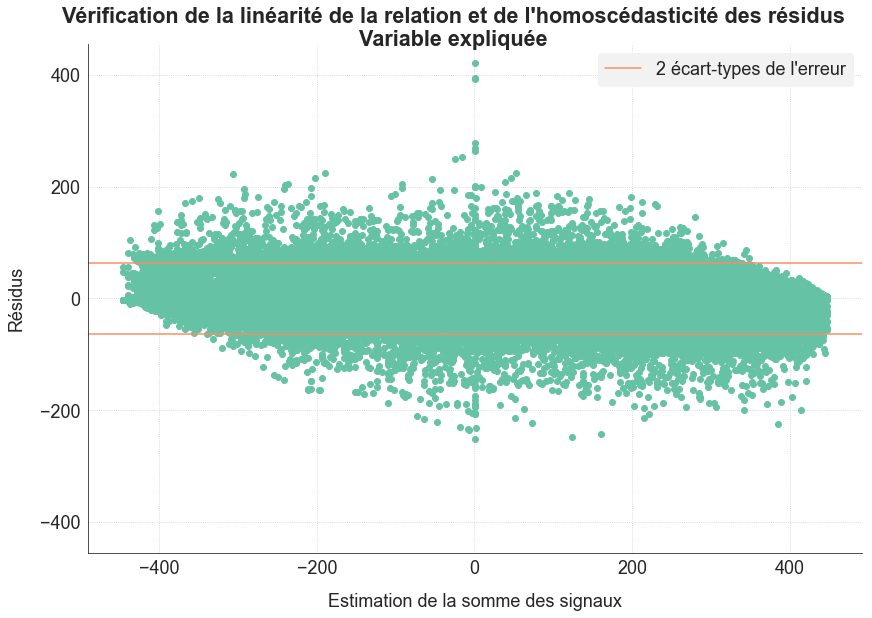

In [24]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

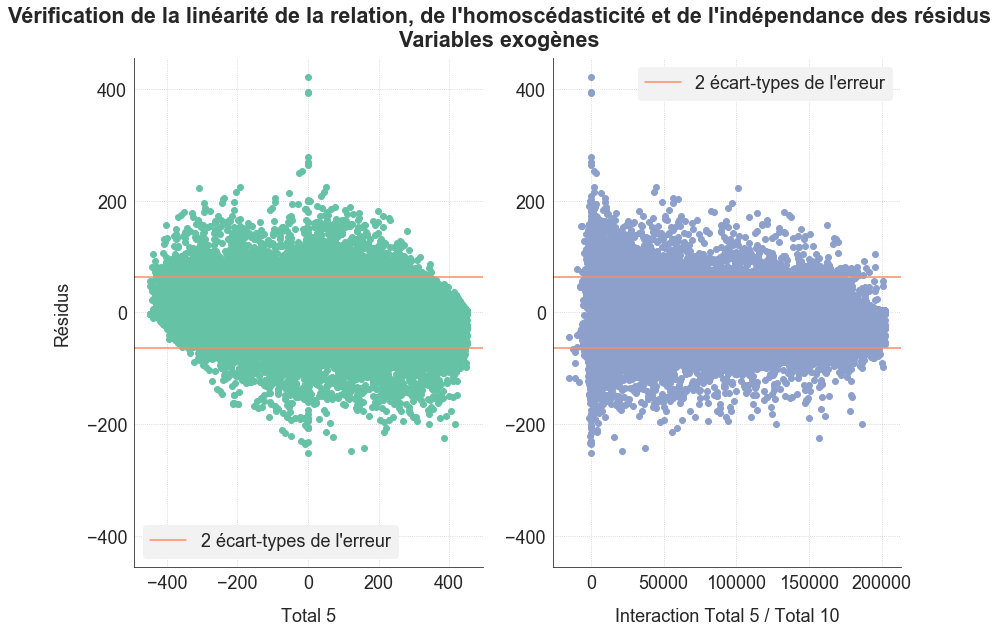

In [25]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=1, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["total_5:total_10"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Interaction Total 5 / Total 10", multi_index=2)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_04_linearite_homoscedasticite_exo.png")
plt.show()

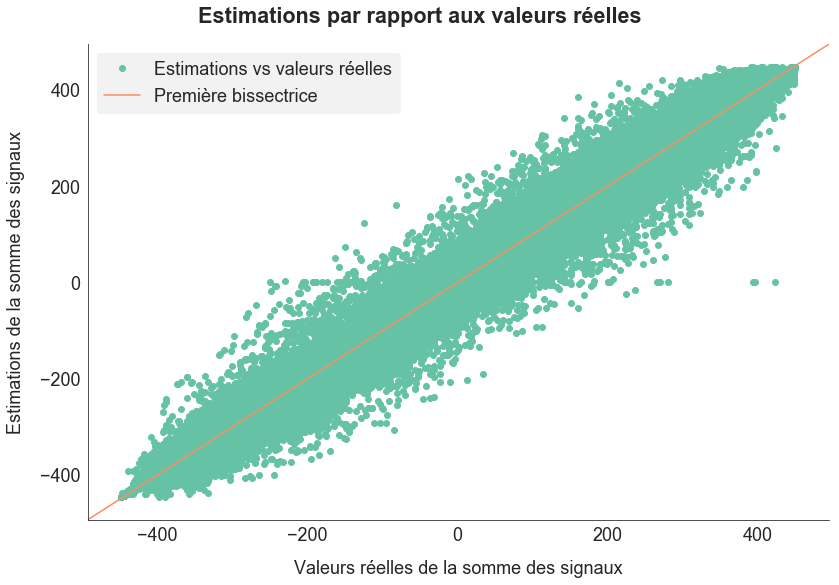

In [26]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.somme_signaux, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [27]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [28]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

,0
levier,0.00008369
cook,0.00005580


In [29]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (296 sur 71690)


,observation_name,levier,outlier,cook_distance,influence
163,163,0.000138,True,0.000197,True
175,175,0.000092,True,0.000680,True
356,358,0.000091,True,0.000093,True
408,410,0.000091,True,0.000154,True
588,590,0.000116,True,0.000171,True
590,592,0.000138,True,0.000304,True
754,757,0.000090,True,0.000276,True
1241,1244,0.000085,True,0.000136,True
1357,1360,0.000145,True,0.000096,True
1473,1476,0.000093,True,0.000145,True


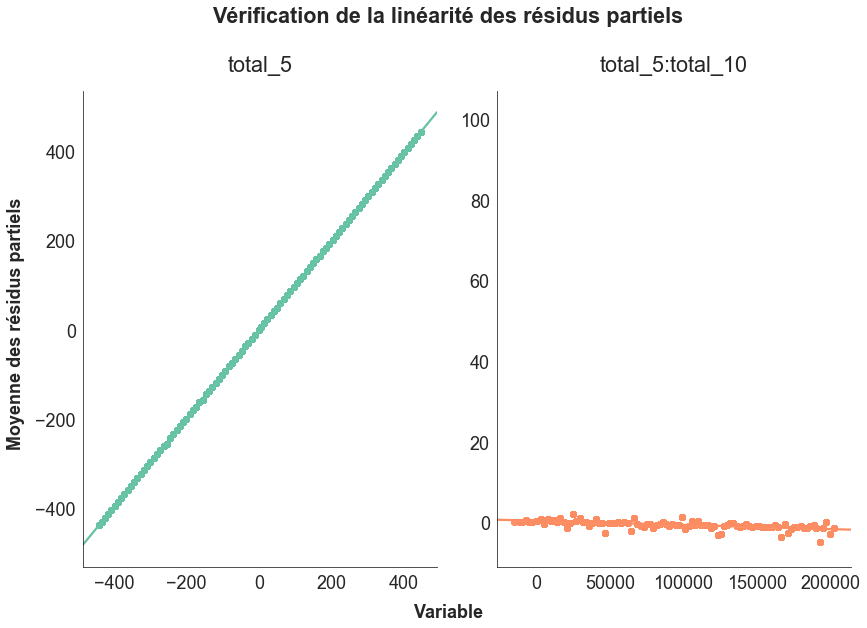

In [30]:
nb_lissage = 100
mygraph = sfg.MyGraph("Vérification de la linéarité des résidus partiels", nblin=1, nbcol=2, is_mono=False)
cpt = 0
for variable in ["total_5","total_5:total_10"]:
    residus_partiels = ((data_model.somme_signaux - anova.fittedvalues) / (anova.fittedvalues * (1-anova.fittedvalues))) + (anova.params[variable] * interdata[variable])
    inter_residus = pd.DataFrame({variable : interdata[variable], "residus_partiels" : residus_partiels})
    variable_classe = "{}_classe".format(variable)
    moyenne_variable = "moyenne_{}".format(variable)
    inter_residus[variable_classe] = pd.cut(inter_residus[variable], bins=nb_lissage)
    average_by_class = inter_residus[[variable_classe,variable,"residus_partiels"]].groupby(variable_classe).mean()
    average_by_class.reset_index(inplace=True)
    average_by_class.columns = [variable_classe,moyenne_variable,"moyenne_residus_partiels"]
    inter_residus = inter_residus.merge(average_by_class, on=variable_classe, how="left")
    cpt += 1
    mygraph.add_regplot(x=inter_residus[moyenne_variable], y=inter_residus.moyenne_residus_partiels, subtitle="{}".format(variable), show_labels=False, multi_index=cpt)
mygraph.fig.text(0.5, -0.01, "Variable", ha='center', fontweight='bold')
mygraph.fig.text(-0.01, 0.5, "Moyenne des résidus partiels", va='center', rotation='vertical', fontweight='bold')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("logistic_04_verif_independance.png")
plt.show()

**Score obtenu avec les paramètres initiaux sur l'ensemble des données**

In [31]:
data_model = echant_alea21.copy()
data_model["total_5:total_10"] = data_model.total_5 * data_model.total_10
sk_y = data_model[["somme_signaux"]].copy()
sk_X = data_model[["total_5","total_5:total_10"]].copy()
sk_model = LinearRegression(fit_intercept=True)
sk_regression = sk_model.fit(sk_X, sk_y)
all_data = data21.copy()
all_data["total_5:total_10"] = all_data.total_5 * all_data.total_10
all_y = all_data[["somme_signaux"]].copy()
all_X = all_data[["total_5","total_5:total_10"]].copy()
all_score = sk_regression.score(all_X, all_y)
print("R² obtenu sur toutes les données : {:.2%}".format(all_score))

R² obtenu sur toutes les données : 98.64%


**Cross-validation sur l'ensemble des données**

In [32]:
data_model = data21.copy()
data_model["total_5:total_10"] = data_model.total_5 * data_model.total_10
sk_y = data_model[["somme_signaux"]].copy()
sk_X = data_model[["total_5","total_5:total_10"]].copy()
sk_model = LinearRegression(fit_intercept=True)
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(sk_model, sk_X, sk_y, cv=kfold)
dfresults = pd.DataFrame(data=[cv_results], columns=["Groupe {}".format(cpt) for cpt in np.arange(5)], index=["R²"])
dfresults["Moyenne"] = cv_results.mean()
dfresults["Ecart-type"] = cv_results.std(ddof=1)
dfresults

,Groupe 0,Groupe 1,Groupe 2,Groupe 3,Groupe 4,Moyenne,Ecart-type
R²,0.984169,0.985628,0.983225,0.988116,0.987404,0.985708,0.002075


Le modèle obtient un R² très bon et stable.

### 3.7.2. Estimation de la somme des signaux à partir de la dernière somme connue et des variations passées

**Rappel du modèle de base**

In [33]:
data_model = echant_alea21[["somme_signaux","total_5","diff_5_10","diff_10_15","diff_15_20"]].copy()
len(data_model)

71690

In [34]:
anova = smf.ols(formula="somme_signaux ~  total_5 + diff_5_10 + diff_10_15 + diff_15_20", data=data_model).fit()
anova.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          somme_signaux   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.021e+06
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:58:44   Log-Likelihood:            -3.3339e+05
No. Observations:               71690   AIC:                         6.668e+05
Df Residuals:                   71685   BIC:                         6.668e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1126      0.101     10.983      0.000       0.914       1.311
total_5        0.9873      0.000   2770.147      0.000       0.987       0.988
diff_5_10      0.5072      0.004    135.300      0.000       0.500       0.515
diff_10_15     0.1496      0.004     35.855      0.000       0.141       0.158
diff_15_20     0.0107      0.004      2.839      0.005       0.003       0.018
==============================================================================
Omnibus:                    15017.273   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           613423.394
Skew:                           0.026   Prob(JB):                         0.00
Kurtosis:                      17.330   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

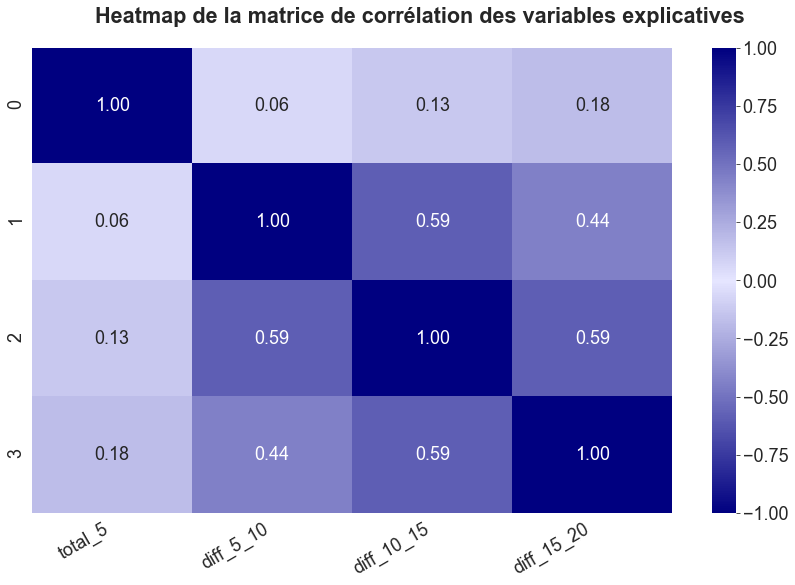

In [35]:
interdata = pd.DataFrame(anova.model.exog, columns=anova.model.exog_names)
variables = anova.model.exog_names.copy()
variables.remove('Intercept')
matrice_correl = np.corrcoef(interdata[variables], rowvar=False)
mygraph = sfg.MyGraph("Heatmap de la matrice de corrélation des variables explicatives", is_mono=True)
sns.heatmap(matrice_correl, vmin=-1, vmax=1, fmt='.2f', cmap=plc.LinearSegmentedColormap.from_list("", [mygraph.liste_couleurs[-1],mygraph.liste_couleurs[0],mygraph.liste_couleurs[-1]]), \
            cbar_kws={'ticks':[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]}, annot=True, ax=mygraph.ax[0])
#mygraph.set_axe('y', tick_labels=variables, rotation=0)
mygraph.set_axe('x', tick_labels=variables, rotation=30, ha='right')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_05_matrice_correl.png")
plt.show()

In [36]:
variables = anova.model.exog
vif_analysis = pd.DataFrame([variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])], \
                          index=[var for var in anova.model.exog_names if var!="Intercept"], columns=["VIF"])
print("ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)")
vif_analysis

ANALYSE DE LA MULTI-COLINÉARITÉ (l'indice VIF doit être inférieur à 4)


,VIF
total_5,1.035172
diff_5_10,1.578594
diff_10_15,1.943961
diff_15_20,1.592137


In [37]:
table_anova = sm.stats.anova_lm(anova, typ=2)
table_anova.loc["total","sum_sq"] = table_anova.loc[:,"sum_sq"].sum()
table_anova.loc["total","df"] = table_anova.loc[:,"df"].sum()
table_anova["eta_squared"] = table_anova[:-2]["sum_sq"] / table_anova.loc["total","sum_sq"]
cmr = table_anova["sum_sq"][-1] / table_anova["df"][-1]
table_anova["omega_squared"] = (table_anova[:-2]["sum_sq"] - (table_anova[:-2]["df"] * cmr)) / (table_anova.loc["total","sum_sq"] + cmr)
table_anova

,sum_sq,df,F,PR(>F),eta_squared,omega_squared
total_5,4.919164e+09,1.0,7.673716e+06,0.000000e+00,0.988244,0.988216
diff_5_10,1.173487e+07,1.0,1.830596e+04,0.000000e+00,0.002357,0.002344
diff_10_15,8.241127e+05,1.0,1.285586e+03,4.604645e-279,0.000166,0.000152
diff_15_20,5.165842e+03,1.0,8.058526e+00,4.530275e-03,0.000001,-0.000013
Residual,4.595300e+07,71685.0,NaN,NaN,NaN,NaN
total,4.977681e+09,71689.0,NaN,NaN,NaN,NaN


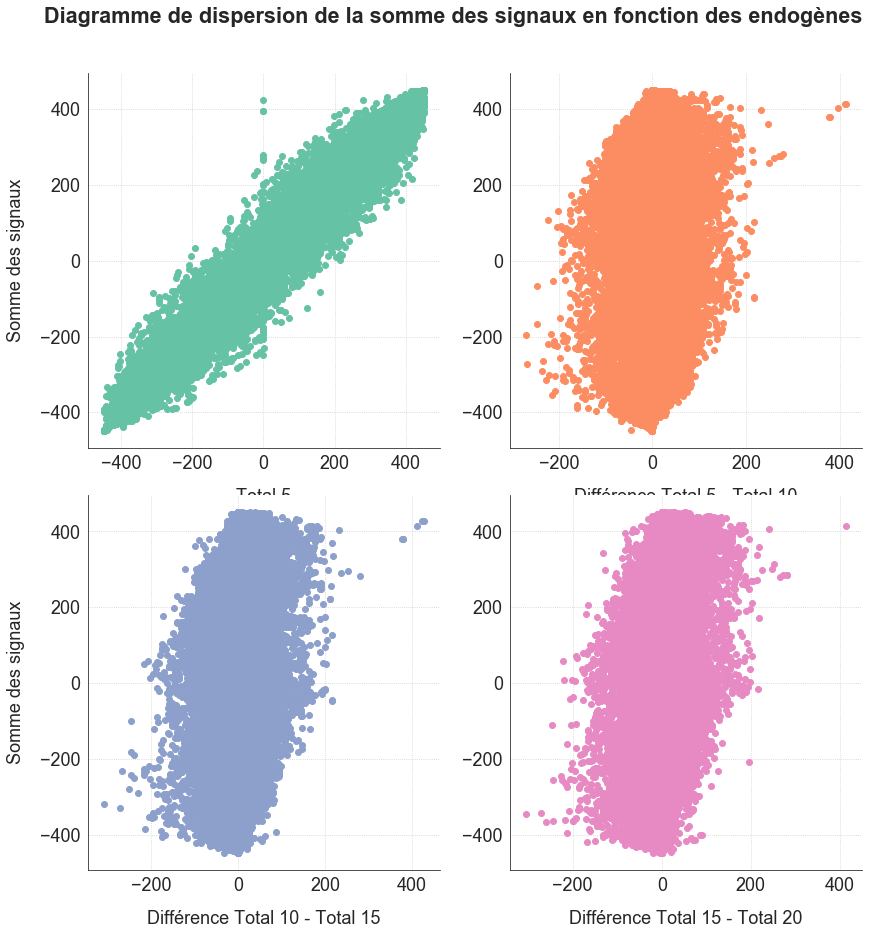

In [38]:
mygraph = sfg.MyGraph("Diagramme de dispersion de la somme des signaux en fonction des endogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["diff_5_10"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[1], markerfacecolor=mygraph.liste_couleurs[1], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["diff_10_15"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[2], markerfacecolor=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["diff_15_20"], data_model.somme_signaux, label="", marker='o', markeredgecolor=mygraph.liste_couleurs[3], markerfacecolor=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=4)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Somme des signaux", multi_index=1)
mygraph.set_axe('y', label="Somme des signaux", multi_index=3)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_00_diagramme_dispersion.png")
plt.show()

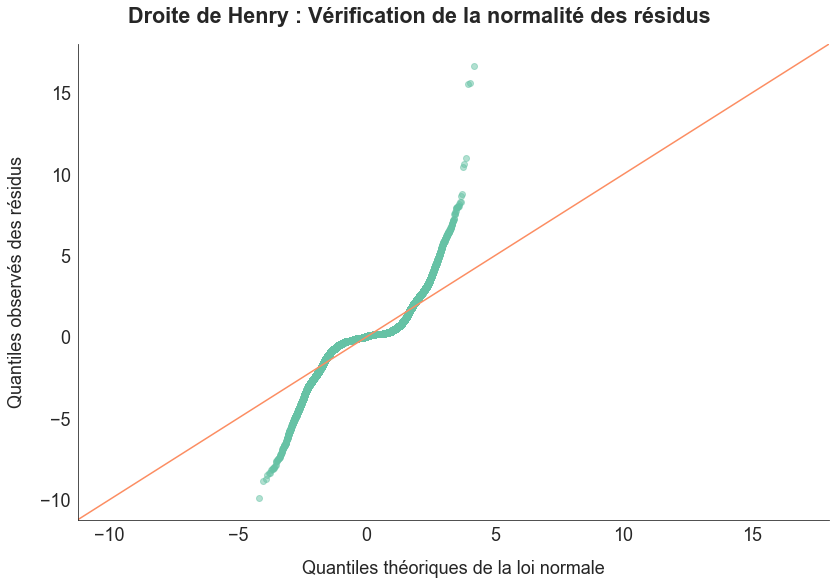

In [39]:
mygraph = sfg.MyGraph("Droite de Henry : Vérification de la normalité des résidus", is_mono=False)
sm.qqplot(anova.resid, fit=True, markeredgecolor=mygraph.liste_couleurs[0], markerfacecolor=mygraph.liste_couleurs[0], alpha=0.5, ax=mygraph.ax[0])
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="", color=mygraph.liste_couleurs[1])
mygraph.set_axe('x', label="Quantiles théoriques de la loi normale")
mygraph.set_axe('y', label="Quantiles observés des résidus")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova01_02_droite_henry.png")
plt.show()

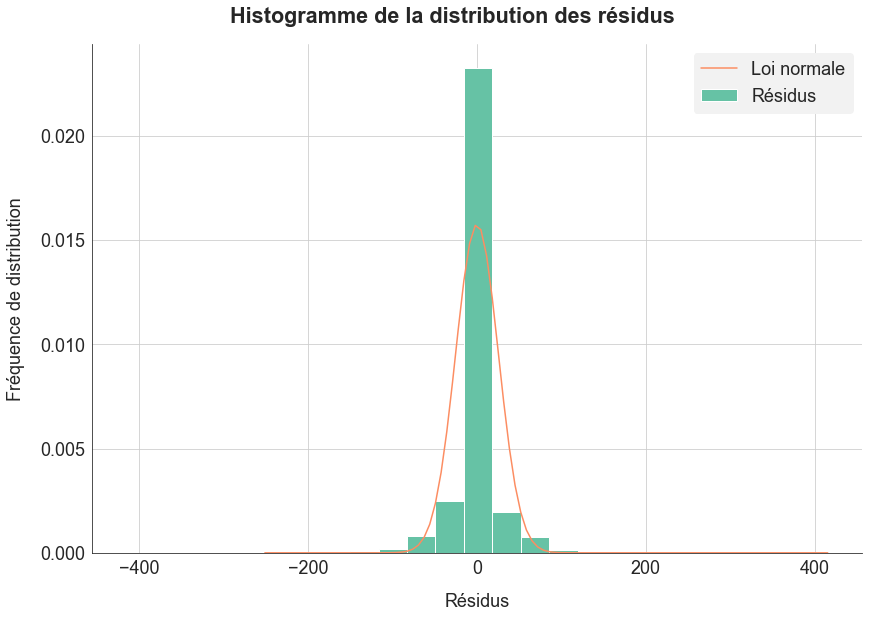

In [40]:
x_theo = np.arange(anova.resid.min(), anova.resid.max(), 0.01*(anova.resid.max()-anova.resid.min()))
mygraph = sfg.MyGraph("Histogramme de la distribution des résidus", is_mono=False)
mygraph.add_histogramme(anova.resid, bins=20, labels="Résidus")
mygraph.add_plot(x_theo, st.norm.pdf(x_theo, scale=anova.resid.std(ddof=1)), label="Loi normale", legend=True)
xmin, xmax = mygraph.ax[0].get_xlim()
absmax = max(-xmin, xmax)
mygraph.set_axe('y', label="Fréquence de distribution")
mygraph.set_axe('x', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
plt.savefig("anova04_01_distribution_residus.png")
plt.show()

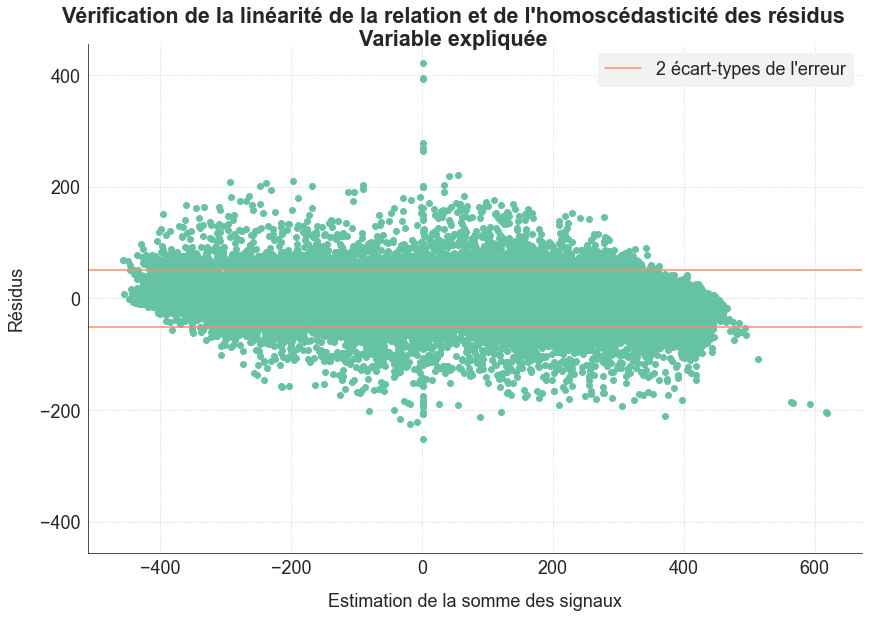

In [41]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation et de l'homoscédasticité des résidus\nVariable expliquée", is_mono=False)
mygraph.add_plot(anova.fittedvalues, anova.resid, label="", marker='o', linestyle='', with_grid='both', grid_style=":")
yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1])
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Estimation de la somme des signaux")
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_03_linearite_homoscedasticite_endo.png")
plt.show()

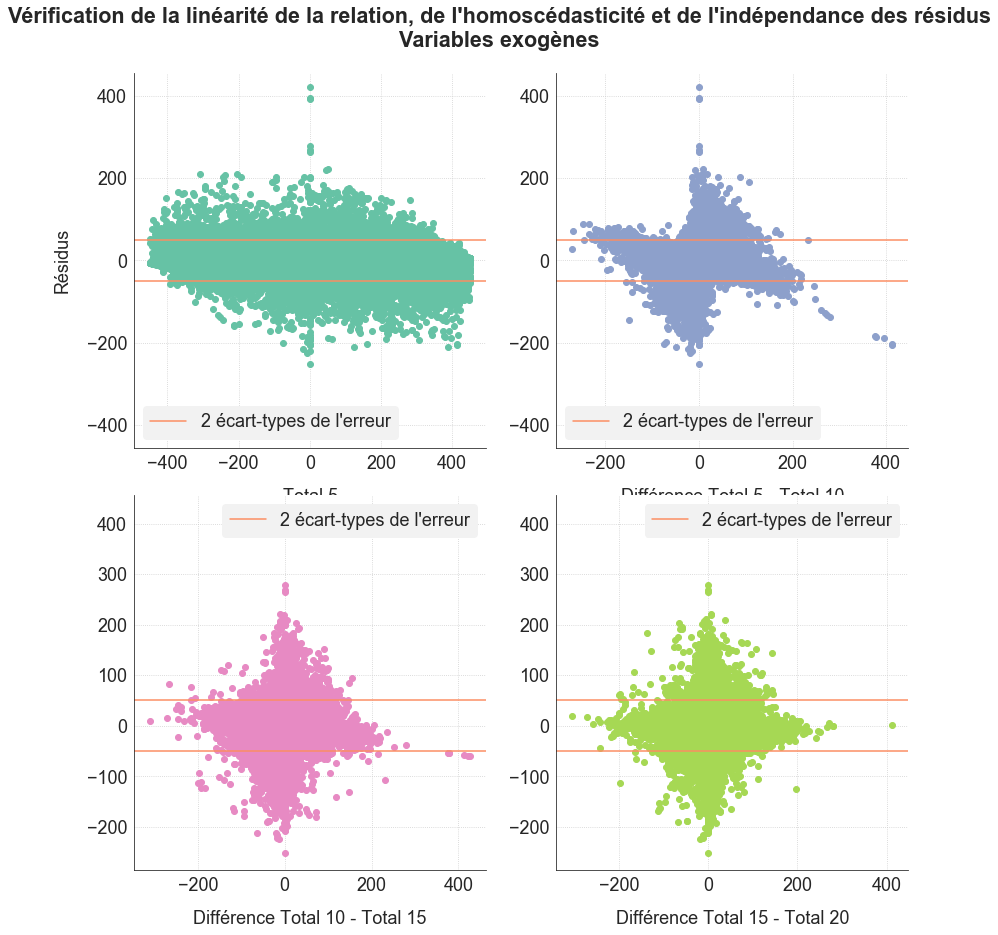

In [42]:
mygraph = sfg.MyGraph("Vérification de la linéarité de la relation, de l'homoscédasticité et de l'indépendance des résidus\nVariables exogènes", nblin=2, nbcol=2, is_mono=False)
mygraph.add_plot(interdata["total_5"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[0], linestyle='', with_grid='both', grid_style=":", multi_index=1)
mygraph.add_plot(interdata["diff_5_10"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[2], linestyle='', with_grid='both', grid_style=":", multi_index=2)
mygraph.add_plot(interdata["diff_10_15"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[3], linestyle='', with_grid='both', grid_style=":", multi_index=3)
mygraph.add_plot(interdata["diff_15_20"], anova.resid, label="", marker='o', color=mygraph.liste_couleurs[4], linestyle='', with_grid='both', grid_style=":", multi_index=4)
#yseuil = 2 * np.sqrt(table_anova.loc["Residual","sum_sq"] / table_anova.loc["Residual","df"])
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=1)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=1)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=2)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=2)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=3)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=3)
mygraph.add_line(-yseuil, vertical=False, color=mygraph.liste_couleurs[1], multi_index=4)
mygraph.add_line(yseuil, vertical=False, label="2 écart-types de l'erreur", color=mygraph.liste_couleurs[1], legend=True, multi_index=4)
ymin, ymax = mygraph.ax[0].get_ylim()
absmax = max(-ymin, ymax, 1.1*yseuil)
mygraph.set_axe('x', label="Total 5", multi_index=1)
mygraph.set_axe('x', label="Différence Total 5 - Total 10", multi_index=2)
mygraph.set_axe('x', label="Différence Total 10 - Total 15", multi_index=3)
mygraph.set_axe('x', label="Différence Total 15 - Total 20", multi_index=4)
mygraph.set_axe('y', label="Résidus", tick_min=-absmax, tick_max=absmax, multi_index=1)
mygraph.set_axe('y', tick_min=-absmax, tick_max=absmax, multi_index=2)
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_04_linearite_homoscedasticite_exo.png")
plt.show()

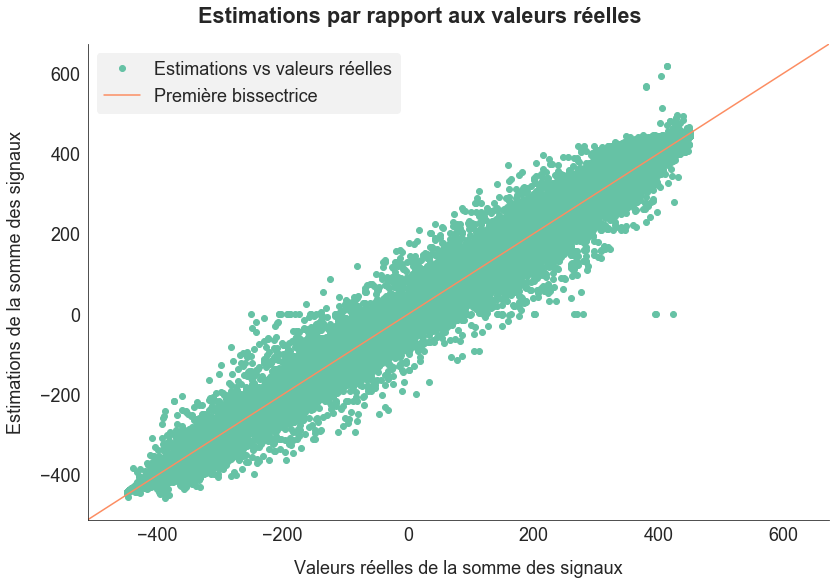

In [43]:
mygraph = sfg.MyGraph("Estimations par rapport aux valeurs réelles", is_mono=False)
mygraph.add_plot(data_model.somme_signaux, anova.fittedvalues, label="Estimations vs valeurs réelles", marker='o', linestyle="")
ymin, ymax = mygraph.ax[0].get_ylim()
xmin, xmax = mygraph.ax[0].get_xlim()
data_min = min(xmin, ymin)
data_max = max(xmax, ymax)
mygraph.add_plot([data_min, data_max], [data_min, data_max], label="Première bissectrice", legend=True)
mygraph.set_axe('y', label="Estimations de la somme des signaux")
mygraph.set_axe('x', label="Valeurs réelles de la somme des signaux")
mygraph.ax[0].autoscale(enable=True, axis='both', tight=True)
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("anova04_06_accuracy_graph.png")
plt.show()

In [44]:
n, p = anova.model.exog.shape
p = p - 1  # j'enlève la constante du nombre de paramètres pour ajuster les seuils
seuils = pd.Series(index=["levier", "resid_student", "dffits", "cook","dfbetas"])
seuils.levier = 2 * (p + 1) / n
seuils.dffits = 2 * np.sqrt((p + 1) / n)
seuils.cook = 4 / (n - p - 1)
seuils.resid_student = st.t.ppf(1-(0.05/2), n-p-2)  # seuil de 5% pour les résidus studentisés
reg_influence = anova.get_influence()
analyses = pd.DataFrame({"observation_name":data_model.index})
analyses["levier"] = reg_influence.hat_matrix_diag
#analyses["external_resid_student"] = reg_influence.resid_studentized_external
#analyses["outlier"] = ((analyses.levier > seuils.levier) | (abs(analyses.external_resid_student) > seuils.resid_student))
analyses["outlier"] = analyses.levier > seuils.levier
#analyses["dffits"] = reg_influence.dffits[0]
analyses["cook_distance"] = reg_influence.cooks_distance[0]
analyses["influence"] = analyses.cook_distance > seuils.cook
#analyses["influence"] = (abs(analyses.dffits) > seuils.dffits) | (analyses.cook_distance > seuils.cook)

In [45]:
seuils[["levier","cook"]].to_frame().style.format("{:.8f}")

,0
levier,0.00013949
cook,0.00005580


In [46]:
only_both = True
if only_both == False:
    variables_speciales = analyses[(analyses.outlier | analyses.influence) & (analyses.outlier != analyses.influence)]
    print("Résumé des observations atypiques OU influentes ({} sur {})".format(len(variables_speciales), len(interdata)))
    print(variables_speciales)
    print("")
variables_investigation = analyses[analyses.outlier & analyses.influence]
print("Résumé des observations atypiques ET influentes ({} sur {})".format(len(variables_investigation), len(interdata)))
variables_investigation

Résumé des observations atypiques ET influentes (2175 sur 71690)


,observation_name,levier,outlier,cook_distance,influence
21,21,0.000229,True,0.000061,True
41,41,0.000295,True,0.000078,True
51,51,0.000246,True,0.000070,True
84,84,0.000242,True,0.000121,True
127,127,0.000413,True,0.000130,True
139,139,0.000502,True,0.003342,True
195,195,0.000268,True,0.000093,True
223,223,0.000425,True,0.000383,True
280,281,0.000143,True,0.000136,True
289,290,0.000578,True,0.002177,True


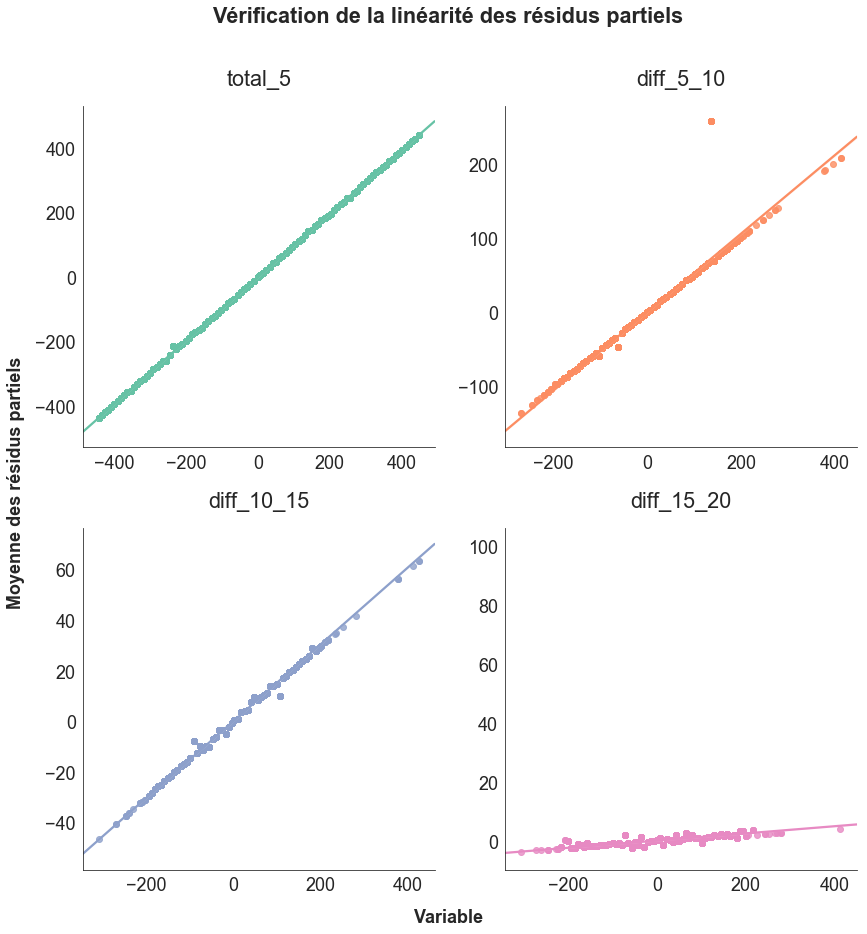

In [47]:
nb_lissage = 100
mygraph = sfg.MyGraph("Vérification de la linéarité des résidus partiels", nblin=2, nbcol=2, is_mono=False)
cpt = 0
for variable in ["total_5","diff_5_10","diff_10_15","diff_15_20"]:
    residus_partiels = ((data_model.somme_signaux - anova.fittedvalues) / (anova.fittedvalues * (1-anova.fittedvalues))) + (anova.params[variable] * interdata[variable])
    inter_residus = pd.DataFrame({variable : interdata[variable], "residus_partiels" : residus_partiels})
    variable_classe = "{}_classe".format(variable)
    moyenne_variable = "moyenne_{}".format(variable)
    inter_residus[variable_classe] = pd.cut(inter_residus[variable], bins=nb_lissage)
    average_by_class = inter_residus[[variable_classe,variable,"residus_partiels"]].groupby(variable_classe).mean()
    average_by_class.reset_index(inplace=True)
    average_by_class.columns = [variable_classe,moyenne_variable,"moyenne_residus_partiels"]
    inter_residus = inter_residus.merge(average_by_class, on=variable_classe, how="left")
    cpt += 1
    mygraph.add_regplot(x=inter_residus[moyenne_variable], y=inter_residus.moyenne_residus_partiels, subtitle="{}".format(variable), show_labels=False, multi_index=cpt)
mygraph.fig.text(0.5, -0.01, "Variable", ha='center', fontweight='bold')
mygraph.fig.text(-0.01, 0.5, "Moyenne des résidus partiels", va='center', rotation='vertical', fontweight='bold')
mygraph.fig.tight_layout()
fig, ax = mygraph.fig, mygraph.ax
#plt.savefig("logistic_04_verif_independance.png")
plt.show()

**Score obtenu avec les paramètres initiaux sur l'ensemble des données**

In [48]:
data_model = echant_alea21.copy()
sk_y = data_model[["somme_signaux"]].copy()
sk_X = data_model[["total_5","diff_5_10","diff_10_15","diff_15_20"]].copy()
sk_model = LinearRegression(fit_intercept=True)
sk_regression = sk_model.fit(sk_X, sk_y)
all_data = data21.copy()
all_y = all_data[["somme_signaux"]].copy()
all_X = all_data[["total_5","diff_5_10","diff_10_15","diff_15_20"]].copy()
all_score = sk_regression.score(all_X, all_y)
print("R² obtenu sur toutes les données : {:.2%}".format(all_score))

R² obtenu sur toutes les données : 99.14%


**Cross-validation sur l'ensemble des données**

In [49]:
data_model = data21.copy()
sk_y = data_model[["somme_signaux"]].copy()
sk_X = data_model[["total_5","diff_5_10","diff_10_15","diff_15_20"]].copy()
sk_model = LinearRegression(fit_intercept=True)
kfold = model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(sk_model, sk_X, sk_y, cv=kfold)
dfresults = pd.DataFrame(data=[cv_results], columns=["Groupe {}".format(cpt) for cpt in np.arange(5)], index=["R²"])
dfresults["Moyenne"] = cv_results.mean()
dfresults["Ecart-type"] = cv_results.std(ddof=1)
dfresults

,Groupe 0,Groupe 1,Groupe 2,Groupe 3,Groupe 4,Moyenne,Ecart-type
R²,0.989939,0.990849,0.989702,0.992584,0.991978,0.99101,0.001255


Les résultats sont encore excellents.

<a id='3_8'></a>

## 3.8. Interprétation des résultats

Le modèle obtient de manière assez logique de bons résultats. Il faut se rappeler que nous analysons des signaux générer par des systèmes à moyen et long terme, qui ne sont pas très sensibles aux petites variation du marché. De ce fait, la somme des signaux n'évolue pas beaucoup d'une semaine sur l'autre dans la plupart du temps. Elle évolue graduellement dans le temps. A l'exception près de l'apparition d'un mouvement correctif brusque qui peut inverser rapidement certains signaux, il y a une forme de dépendance ou d'autocorrélation des sommes des signaux d'une semaine sur l'autre.

Ces résultats sont donc difficilement exploitables car ils apportent peu d'information nouvelle.